In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import csv
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import math
import csv
import pandas as pd

import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler

In [2]:
with open('speeches_clean.csv', newline = '') as file:
    reader = csv.reader(file)
    data = list(reader)

df = pd.DataFrame(data)
df.columns = ['Title', 'Date', 'Text']

In [3]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['Polarity'] = df['Text'].apply(pol)
df['Subjectivity'] = df['Text'].apply(sub)

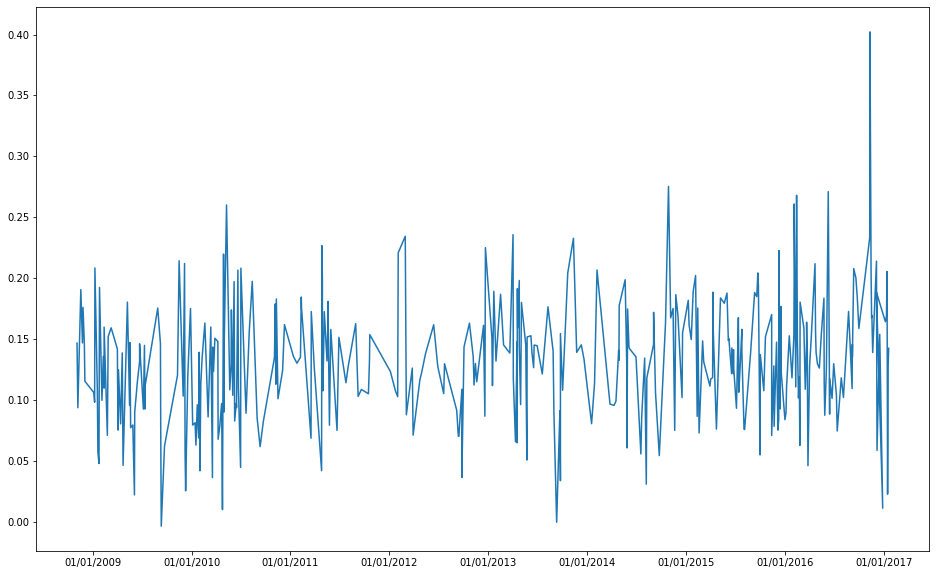

In [4]:
dates = [dt.datetime.strptime(d,'%d %b %Y').date() for d in df['Date']]

fig, axs = plt.subplots(1,1, figsize = (16, 10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
axs.plot(dates, df['Polarity'])

In [5]:
def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
speech_split = []
for i in [0, 52, 69, 118, 135, 159, 163]:
    speech_split.append(split_text(df.iloc[i, 2])) # 0: First Victory Speech, 52: Nobel Prize,
                # 69: Health Care Law, 118: Death of Bin-Laden, 135: End of Iraq War, 159: Second Victory Speech,
                #163: Sandy Hook School Shooting
speech_amount = len(speech_split)

In [7]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)

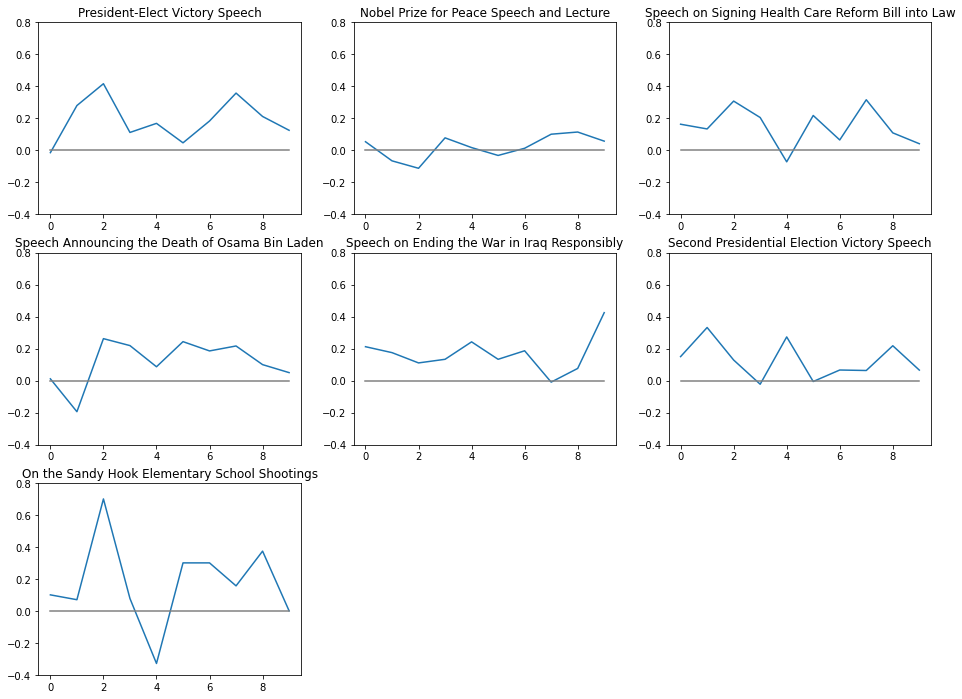

In [8]:
plt.rcParams['figure.figsize'] = [16, 12]
n=0
nw = [0, 52, 69, 118, 135, 159, 163]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    
    plt.ylim(ymin=-.4, ymax=.8)
    
plt.show()

In [9]:
gdp = pd.read_csv(r"US_Economical_Data/GDP.csv", sep=";", decimal=",")
homeprices = pd.read_csv(r"US_Economical_Data/HOMEPRICES.csv", sep=";", decimal=",")
sp_500 = pd.read_csv(r"US_Economical_Data/INDEX_US_S&P.csv", sep=";", decimal=",")
unrate = pd.read_csv(r"US_Economical_Data/UNRATE.csv", sep=";", decimal=",")

x = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in gdp.iloc[:,0]]
x2 = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in homeprices.iloc[:,0]]
x3 = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in sp_500.iloc[:,0]]
x4 = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in unrate.iloc[:,0]]

In [10]:
# Scaling of the data between zero and one. 

# Usage of minmax scaler: 
scaler = MinMaxScaler()

# Scaling of data
gdp[["GDP_Scaled"]] = scaler.fit_transform(gdp[["GDP"]])
homeprices[["CSUSHPINSA_Scaled"]] = scaler.fit_transform(homeprices[["CSUSHPINSA"]])
sp_500[["Open Price_Scaled"]] = scaler.fit_transform(sp_500[["Open Price"]])
unrate[["UNRATE (%)_Scaled"]] = scaler.fit_transform(unrate[["UNRATE (%)"]])
unrate

,Date,UNRATE (%),UNRATE (%)_Scaled
0,01/01/2008,5.0,0.056604
1,01/02/2008,4.9,0.037736
2,01/03/2008,5.1,0.075472
3,01/04/2008,5.0,0.056604
4,01/05/2008,5.4,0.132075
...,...,...,...
104,01/09/2016,5.0,0.056604
105,01/10/2016,4.9,0.037736
106,01/11/2016,4.7,0.000000
107,01/12/2016,4.7,0.000000


In [11]:
concatenated_df = pd.concat([df, gdp, homeprices, sp_500, unrate], axis='columns') # where the dates are the same
pd.options.display.max_rows
concatenated_df.head()

,Title,Date,Text,Polarity,Subjectivity,Date,GDP,GDP_Scaled,Date,CSUSHPINSA,CSUSHPINSA_Scaled,Date,Open Price,Open Price_Scaled,Date,UNRATE (%),UNRATE (%)_Scaled
0,President-Elect Victory Speech,04 Nov 2008,ll dream alive time still power democracy toni...,0.146923,0.436356,01/01/2008,14706.54,0.068159,01/01/2008,171.079,0.731725,01/01/2008,1447.16,0.491354,01/01/2008,5.0,0.056604
1,First President-Elect Press Conference,07 Nov 2008,irectly audio morning woke sobering news state...,0.093936,0.420103,01/04/2008,14865.70,0.101507,01/02/2008,169.194,0.694533,01/02/2008,1381.72,0.447150,01/02/2008,4.9,0.037736
2,Global Climate Summit Prerecorded Speech,18 Nov 2008,g world urgent climate change science beyond d...,0.190776,0.453152,01/07/2008,14899.00,0.108484,01/03/2008,167.906,0.669120,01/03/2008,1329.68,0.411998,01/03/2008,5.1,0.075472
3,Economic Team Announcement Speech,24 Nov 2008,ed text version directly audio news past week ...,0.147082,0.342789,01/10/2008,14608.21,0.047556,01/04/2008,167.324,0.657637,01/04/2008,1340.94,0.419604,01/04/2008,5.0,0.056604
4,Economic Recovery Advisory Board Announcement,26 Nov 2008,crisis historic moment nation history old way...,0.176241,0.356387,01/01/2009,14430.90,0.010405,01/05/2008,167.021,0.651658,01/05/2008,1384.23,0.448846,01/05/2008,5.4,0.132075


In [12]:
merged_df = gdp.merge( homeprices,how='left', on='Date') # where the dates are the same
merged_df = merged_df.merge(sp_500,how='left', on='Date')
merged_df = merged_df.merge(unrate,how='left', on='Date')
merged_df.head()

,Date,GDP,GDP_Scaled,CSUSHPINSA,CSUSHPINSA_Scaled,Open Price,Open Price_Scaled,UNRATE (%),UNRATE (%)_Scaled
0,01/01/2008,14706.54,0.068159,171.079,0.731725,1447.16,0.491354,5.0,0.056604
1,01/04/2008,14865.70,0.101507,167.324,0.657637,1340.94,0.419604,5.0,0.056604
2,01/07/2008,14899.00,0.108484,165.714,0.625871,1266.79,0.369517,5.8,0.207547
3,01/10/2008,14608.21,0.047556,159.163,0.496616,1154.70,0.293802,6.5,0.339623
4,01/01/2009,14430.90,0.010405,149.361,0.303218,904.61,0.124870,7.8,0.584906


In [146]:
homeprices

,Date,CSUSHPINSA,CSUSHPINSA_Scaled
0,01/01/2008,171.079,0.731725
1,01/02/2008,169.194,0.694533
2,01/03/2008,167.906,0.669120
3,01/04/2008,167.324,0.657637
4,01/05/2008,167.021,0.651658
...,...,...,...
104,01/09/2016,183.959,0.985853
105,01/10/2016,184.036,0.987372
106,01/11/2016,184.250,0.991595
107,01/12/2016,184.422,0.994988


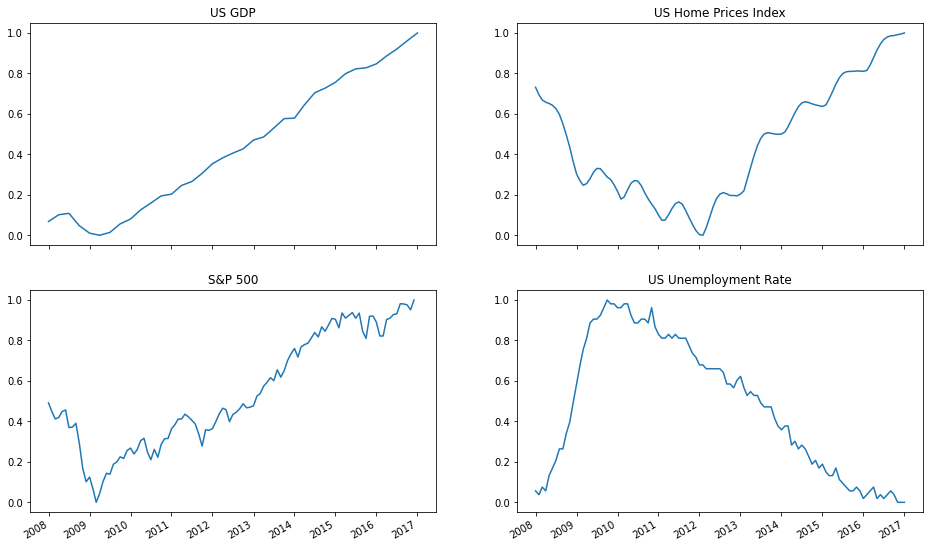

In [13]:
fig, axs = plt.subplots(2,2, figsize = (16, 10), sharex=True)  # Create a figure containing a single axes.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
axs[0,0].plot(x, gdp.iloc[:,2]);  # Plot some data on the axes.
axs[0,0].set_title("US GDP")
axs[0,1].plot(x2, homeprices.iloc[:,2]);
axs[0,1].set_title("US Home Prices Index")
axs[1,0].plot(x3, sp_500.iloc[:,2]);
axs[1,0].set_title("S&P 500")
axs[1,1].plot(x4, unrate.iloc[:,2]);
axs[1,1].set_title("US Unemployment Rate")
fig.autofmt_xdate()

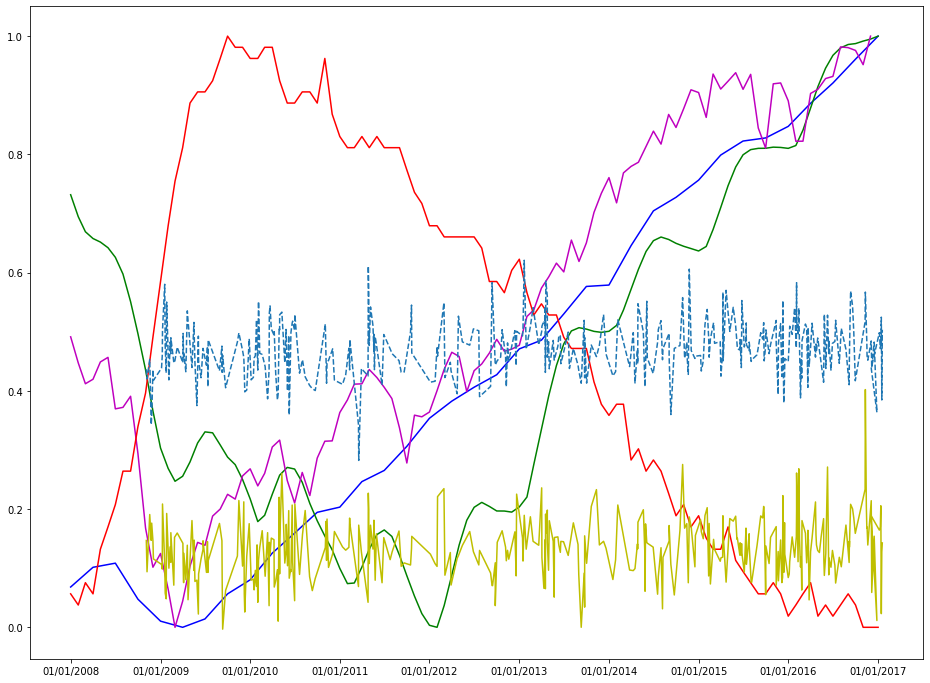

In [14]:
fig, ax = plt.subplots()

# plt.title("US Unemployment Rate")
ax.plot(x, gdp.iloc[:,2], 'b');  # Plot some data on the axes.
# axs[0,0].set_title("US GDP")
ax.plot(x2, homeprices.iloc[:,2],'g');
# axs[0,1].set_title("US Home Prices Index")
ax.plot(x3, sp_500.iloc[:,2],'m');
# axs[1,0].set_title("S&P 500")
ax.plot(x4, unrate.iloc[:,2],'r');
# axs[1,1].set_title("US Unemployment Rate")

dates = [dt.datetime.strptime(d,'%d %b %Y').date() for d in df['Date']]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
ax.plot(dates, df['Polarity'], 'y')

ax.plot(dates, df['Subjectivity'], '--')
plt.show()

In [15]:
df2 = df.copy()
test = [dt.datetime.strptime(d, "%d %b %Y") for d in df['Date']]
print(type(test))
test2 = [dt.datetime.strptime(d, "%d %b %Y") for d in df['Date']]
print(type(test2))
test3 = [dt.datetime.strftime(t, "%m/%Y") for t in test]
print(type(test3))
test2 = pd.DataFrame(test2, columns=['Date_conv1'])
test4 = pd.DataFrame(test3, columns= ['Date_conv'])

df2 = pd.concat([df2, test4], axis='columns') # where the dates are the same
df2 = pd.concat([df2, test2], axis='columns') # where the dates are the same
# merged_df = merged_df.merge(unrate,how='left', on='Date')
df2 = df2.drop(['Date'], axis=1)
df2.rename(columns={'Date_conv': 'Date'}, inplace=True)
df2.head(10)


<class 'list'>
<class 'list'>
<class 'list'>


,Title,Text,Polarity,Subjectivity,Date,Date_conv1
0,President-Elect Victory Speech,ll dream alive time still power democracy toni...,0.146923,0.436356,11/2008,2008-11-04
1,First President-Elect Press Conference,irectly audio morning woke sobering news state...,0.093936,0.420103,11/2008,2008-11-07
2,Global Climate Summit Prerecorded Speech,g world urgent climate change science beyond d...,0.190776,0.453152,11/2008,2008-11-18
3,Economic Team Announcement Speech,ed text version directly audio news past week ...,0.147082,0.342789,11/2008,2008-11-24
4,Economic Recovery Advisory Board Announcement,crisis historic moment nation history old way...,0.176241,0.356387,11/2008,2008-11-26
5,Security Team Announcement Speech,morning everybody hope wonderful thanksgiving ...,0.146528,0.435752,12/2008,2008-12-01
6,Commerce Secretary Announcement,e another key member team nominee secretary co...,0.115682,0.417675,12/2008,2008-12-03
7,Remarks After Meeting with Economic Team,c team message meeting today one comes surpris...,0.106369,0.438431,01/2009,2009-01-05
8,George Mason University Speech,ied text version directly audio let begin maso...,0.098443,0.459377,01/2009,2009-01-08
9,Intelligence Community Leadership Team,thenticity certified text version directly aud...,0.208565,0.502465,01/2009,2009-01-09


In [16]:
merged_df2= merged_df.copy()

merged_df2['Date'] = [dt.datetime.strptime(t, "%d/%m/%Y") for t in merged_df2['Date'] ]
merged_df2['Date']= [dt.datetime.strftime(t, "%m/%Y") for t in merged_df2['Date'] ]
merged_df2 = merged_df2.merge(df2,how='inner', on='Date')
merged_df2.head(10)
# len(merged_df2)
merged_df3 = merged_df2.copy()
merged_df3= merged_df3.drop(['GDP', 'CSUSHPINSA', 'Open Price', 'UNRATE (%)', 'Title', 'Text'], axis=1)
merged_df3.head(5)
transposed = merged_df3.T
transposed.to_csv(r'C:\Users\Theresa\OneDrive - KU Leuven\Documents\Studium_KUL\Semester_2\Modern Data Analytics\Project\merged_df3_transposed.xlsx')

In [147]:
merged_df3

,Date,GDP_Scaled,CSUSHPINSA_Scaled,Open Price_Scaled,UNRATE (%)_Scaled,Polarity,Subjectivity,Date_conv1
0,01/2009,0.010405,0.303218,0.12487,0.584906,0.106369,0.438431,2009-01-05
1,01/2009,0.010405,0.303218,0.12487,0.584906,0.098443,0.459377,2009-01-08
2,01/2009,0.010405,0.303218,0.12487,0.584906,0.208565,0.502465,2009-01-09
3,01/2009,0.010405,0.303218,0.12487,0.584906,0.108106,0.580250,2009-01-18
4,01/2009,0.010405,0.303218,0.12487,0.584906,0.057935,0.475688,2009-01-20
...,...,...,...,...,...,...,...,...
119,01/2017,1.000000,1.000000,NaN,0.000000,0.169369,0.471499,2017-01-10
120,01/2017,1.000000,1.000000,NaN,0.000000,0.205588,0.483262,2017-01-12
121,01/2017,1.000000,1.000000,NaN,0.000000,0.023106,0.524621,2017-01-14
122,01/2017,1.000000,1.000000,NaN,0.000000,0.127556,0.384575,2017-01-16


In [17]:
# get correlations
# all scaled with all subj and all polarity measures
# reduce df

corrs= merged_df3.corr()
corrs

# # get rid of trend and seasonality in the data for each column first!


,GDP_Scaled,CSUSHPINSA_Scaled,Open Price_Scaled,UNRATE (%)_Scaled,Polarity,Subjectivity
GDP_Scaled,1.000000,0.866279,0.981787,-0.936307,0.205820,0.093245
CSUSHPINSA_Scaled,0.866279,1.000000,0.836686,-0.923321,0.090971,0.055309
Open Price_Scaled,0.981787,0.836686,1.000000,-0.903513,0.205479,0.085039
UNRATE (%)_Scaled,-0.936307,-0.923321,-0.903513,1.000000,-0.174357,-0.105767
Polarity,0.205820,0.090971,0.205479,-0.174357,1.000000,0.367490
Subjectivity,0.093245,0.055309,0.085039,-0.105767,0.367490,1.000000


# overlay of sentiments across topics


In [18]:
print(df['Title'][df['Title'].str.contains('Shooting')])
# Take Navy Yard Shooting Out, it is only a memorial speech

163    On the Sandy Hook Elementary School Shootings
199               Navy Yard Shooting Memorial Speech
265    On the Charleston Emanuel AME Church Shooting
284        On Umpqua Community College Mass Shooting
Name: Title, dtype: object


In [19]:
speech_split = []
for i in [163, 265, 284]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [20]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_shooting = np.mean(speech_pol, axis=0)

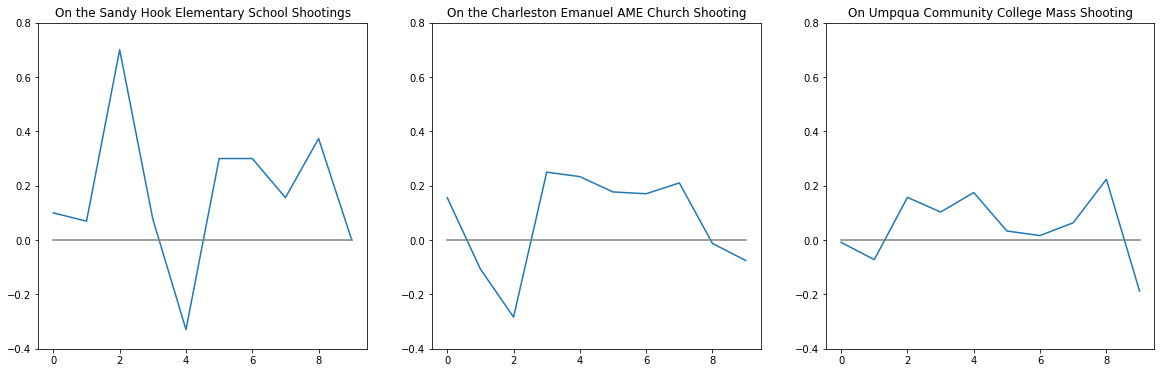

In [21]:
plt.rcParams['figure.figsize'] = [20,6]
n=0
nw = [163, 265, 284]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

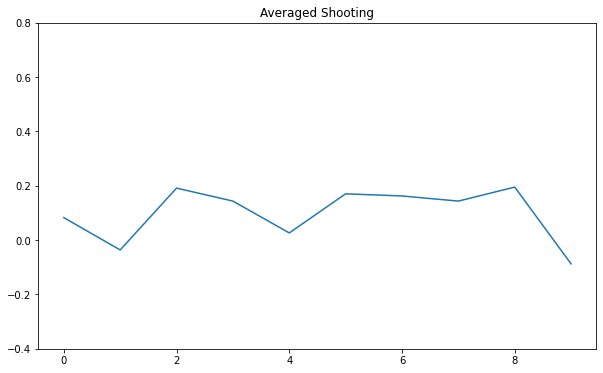

In [22]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_shooting)
plt.title("Averaged Shooting")
plt.ylim(ymin=-.4, ymax=.8)
plt.show()

In [23]:
results = print(df['Title'][df['Title'].str.contains('Iraq')])


19            Ending the Iraq War at Camp Lejeune Speech
93       Disabled Veterans Conference Speech on Iraq OPS
95     National Address on Ending Operation Iraqi Fre...
135         Speech on Ending the War in Iraq Responsibly
140            Iraq War Veterans and Families Gala Toast
227       On Air Strikes and Humanitarian Effort in Iraq
228    Update on Air Strikes and Humanitarian Aid in ...
Name: Title, dtype: object


In [24]:
speech_split = []
for i in [19,93,95, 135, 140, 227, 228]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [25]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_iraq = np.mean(speech_pol, axis=0)

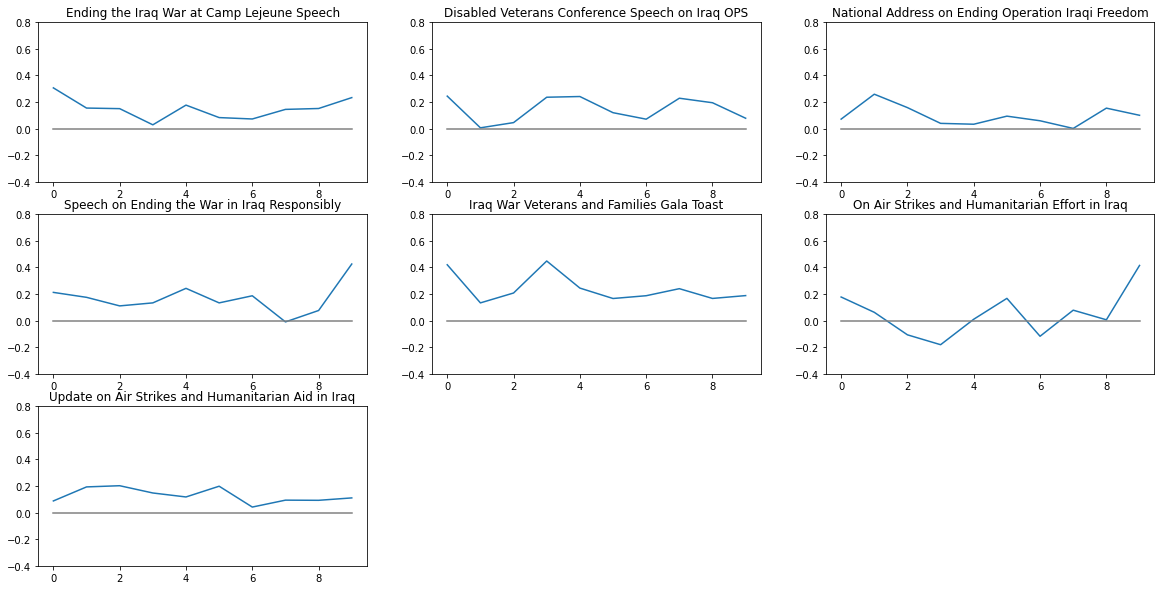

In [26]:
plt.rcParams['figure.figsize'] = [20,10]
n=0
nw = [19,93,95, 135, 140, 227, 228]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

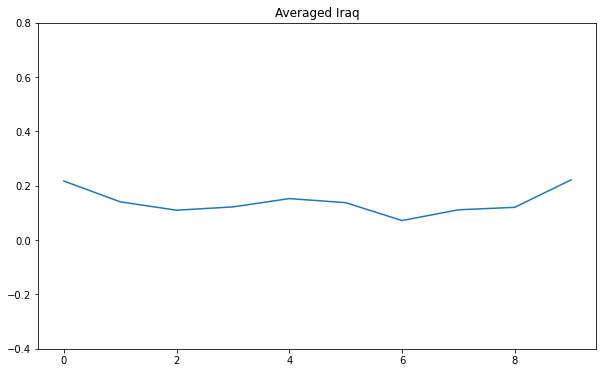

In [27]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_iraq)
plt.title("Averaged Iraq")
plt.ylim(ymin=-.4, ymax=.8)
    
plt.show()

In [28]:
election = print(df['Title'][df['Title'].str.contains('Elect')])

0                         President-Elect Victory Speech
1                 First President-Elect Press Conference
98                     Midterm Election Press Conference
159          Second Presidential Election Victory Speech
160    Post Election Speech on Deficit Reduction and ...
235                   Midterm Elections Press Conference
351    Remarks on the U.S. Presidential Election Outcome
352      First Meeting with President-Elect Donald Trump
353          Post Presidential Election Press Conference
Name: Title, dtype: object


In [29]:
speech_split = []
for i in [0,1, 98,159,160,235,351,352, 353]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [30]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_election = np.mean(speech_pol, axis=0)

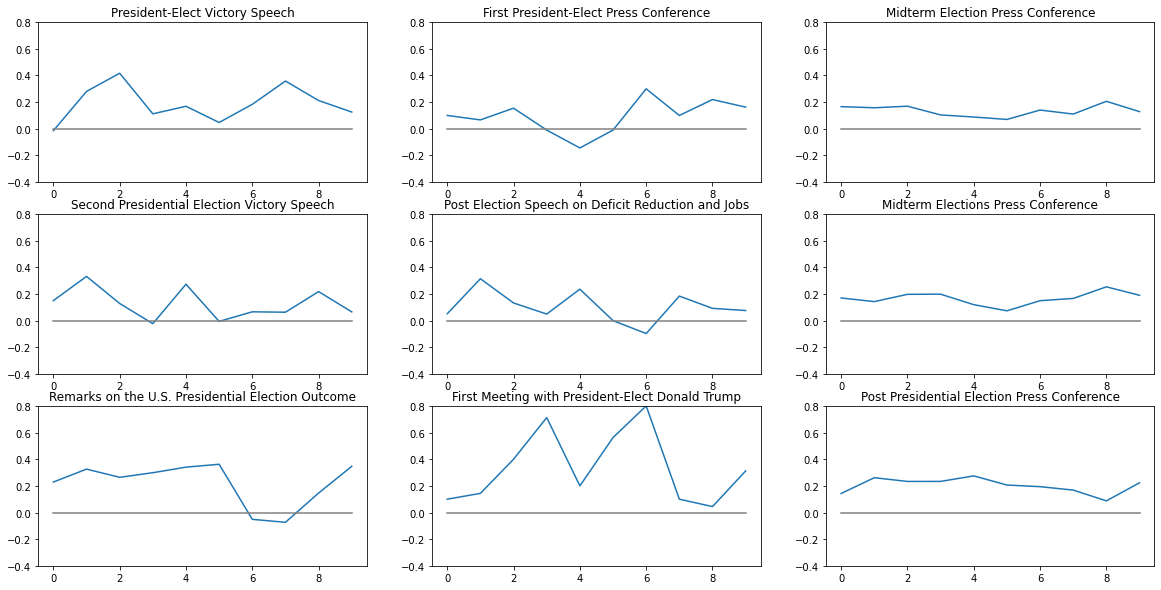

In [31]:
plt.rcParams['figure.figsize'] = [20,10]
n=0
nw =  [0,1, 98,159,160,235,351,352, 353]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

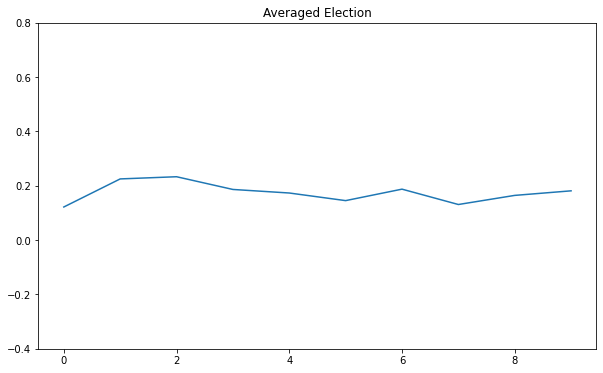

In [32]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_election)
plt.title("Averaged Election")
plt.ylim(ymin=-.4, ymax=.8)
plt.show()

In [33]:
results = print(df['Title'][df['Title'].str.contains('Press Conference')])

1                 First President-Elect Press Conference
15                     First Prime Time Press Conference
21          G-20 London Economic Summit Press Conference
37     Third Prime Time Press Conference (Iran & Heat...
55             National Security Review Press Conference
61      Press Conference on 2010 Budget Sent to Congress
81           Press Conference on Gulf Oil Spill Disaster
98                     Midterm Election Press Conference
122       Joint Press Conference with Benjamin Netanyahu
164                            End Year Press Conference
166                    Final First Term Press Conference
195       Intelligence Gathering Reform Press Conference
207                         End of Year Press Conference
213    Press Conference on Affordable Care Act and Uk...
235                   Midterm Elections Press Conference
242                         End of Year Press Conference
257    Press Conference Following Summit of the Americas
274    Post Iran Nuclear Accord

In [34]:
speech_split = []
for i in [1,15,21,37,55,61,81,98,122,164,166,195,207, 213, 235,242,257,274,291,292, 299, 310, 317,322, 324]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [35]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_press_conference = np.mean(speech_pol, axis=0)

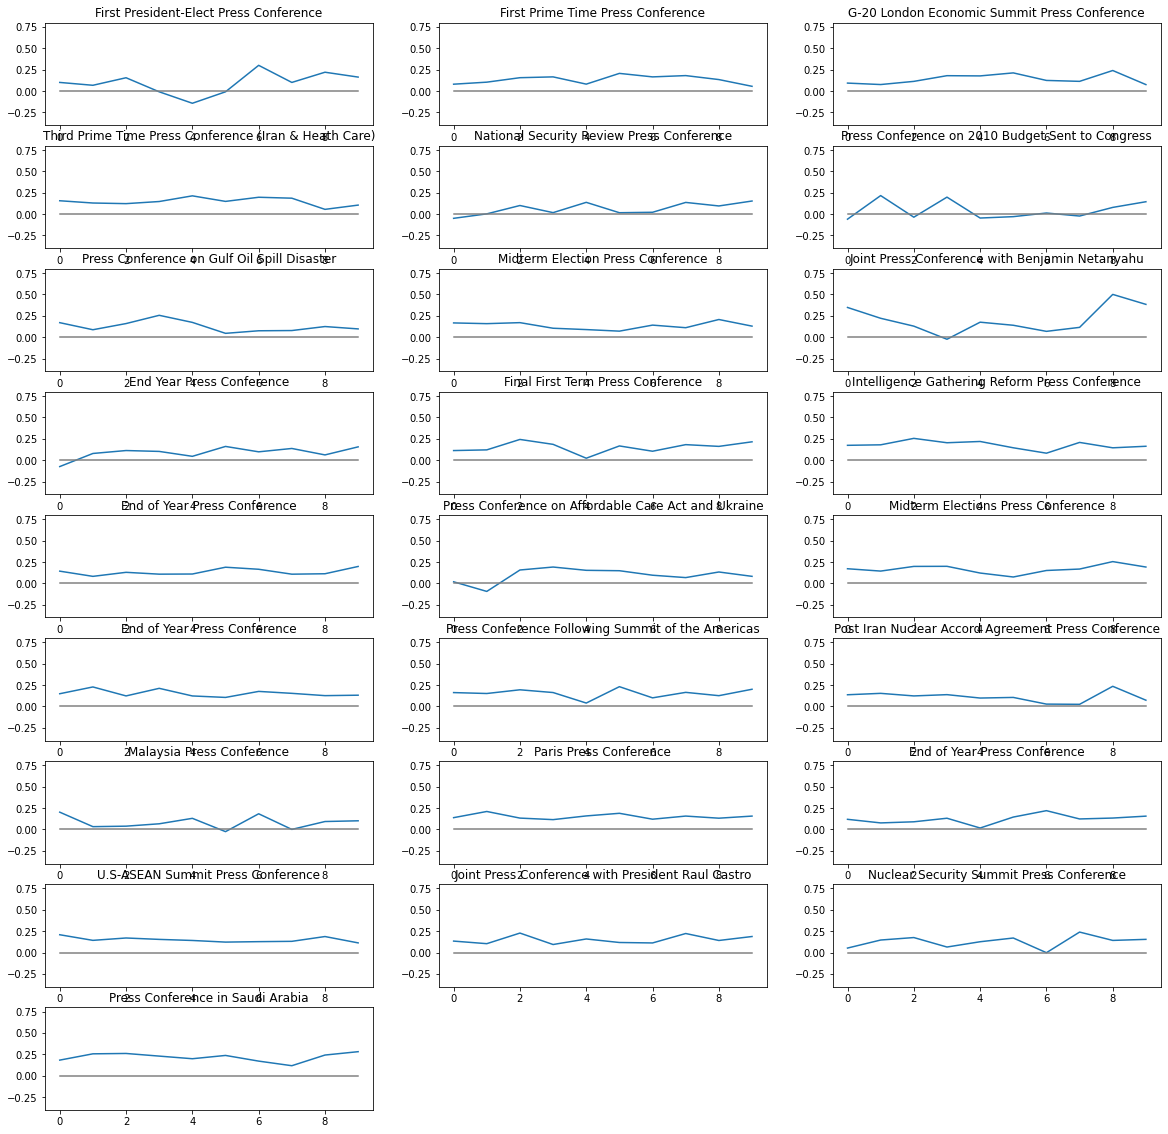

In [36]:
plt.rcParams['figure.figsize'] = [20,20]
n=0
nw = [1,15,21,37,55,61,81,98,122,164,166,195,207, 213, 235,242,257,274,291,292, 299, 310, 317,322, 324]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

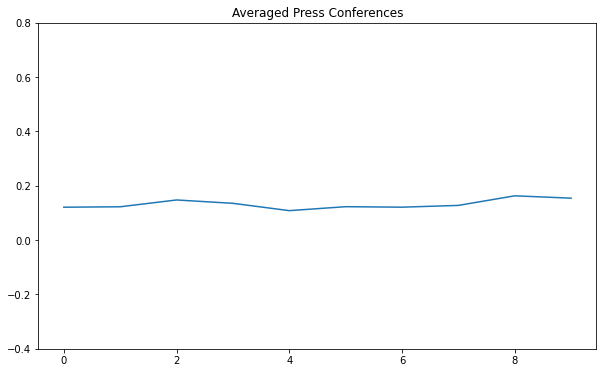

In [37]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_press_conference)
plt.title("Averaged Press Conferences")
plt.ylim(ymin=-.4, ymax=.8)
plt.show()

In [38]:
results = print(df['Title'][df['Title'].str.contains('Address')])

18       State of the Nation Address to Congress Speech
26     First Address at the Central Intelligence Agency
39                          Ghanaian Parliament Address
48                        Town Hall Address in Shanghai
50                      Kennedy Center Honorees Address
                             ...                       
360                             Address at Pearl Harbor
361           Farewell Address to the U.S. Armed Forces
363                       Presidential Farewell Address
364     Joe Biden Medal of Freedom Presentation Address
365                   Final Presidential Weekly Address
Name: Title, Length: 77, dtype: object


In [39]:
speech_split = []
for i in [18,26,39,48,50, 360]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [40]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_address = np.mean(speech_pol, axis=0)

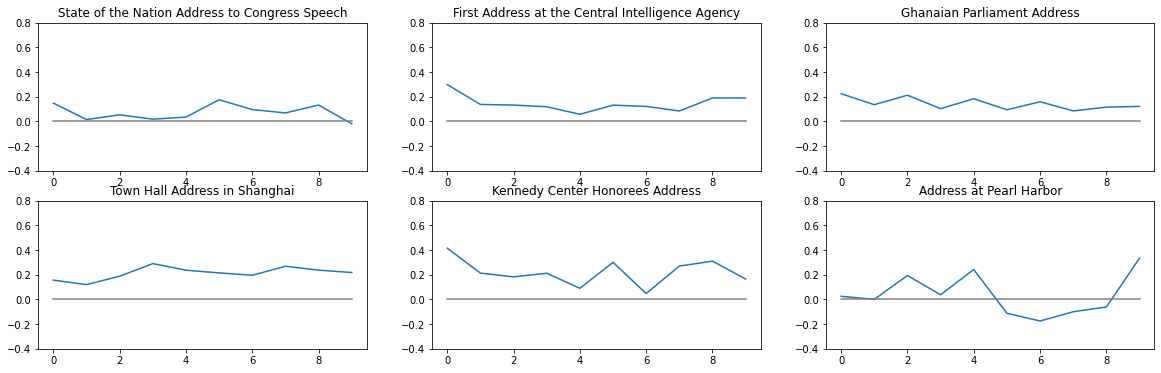

In [41]:
plt.rcParams['figure.figsize'] = [20,6]
n=0
nw = [18,26,39,48,50, 360]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

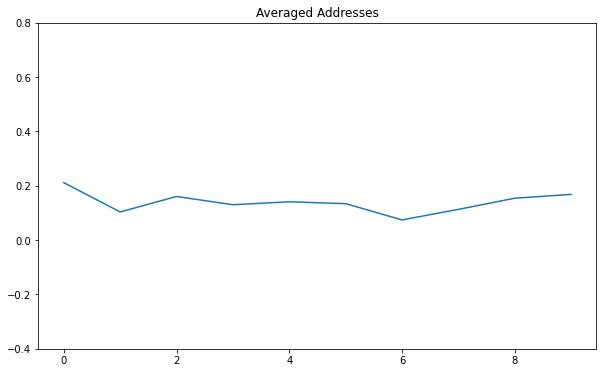

In [42]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_address)
plt.title("Averaged Addresses")
plt.ylim(ymin=-.4, ymax=.8)  
plt.show()

In [43]:
results = print(df['Title'][df['Title'].str.contains('Memorial')])

10              Lincoln Memorial Pre-Inauguration Speech
45                         9/11 Pentagon Memorial Speech
47                     Fort Hood Memorial Service Speech
96                         9/11 Pentagon Memorial Speech
105                       Tucson Memorial Service Speech
133                Speech at the MLK Memorial Dedication
144               U.S. Holocaust Memorial Museum Address
182        West Fertilizer Plant Tragedy Memorial Speech
199                   Navy Yard Shooting Memorial Speech
206    Address at the Public Memorial for Nelson Mandela
332              Address at the Hiroshima Peace Memorial
340                       Dallas Police Memorial Address
347                                9/11 Memorial Address
350                Shimon Peres Memorial Service Address
Name: Title, dtype: object


In [44]:
speech_split = []
for i in [10, 45,47,96,105, 133, 144, 182,199]: # 8,26,39,48,50, 360]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [45]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_memorial = np.mean(speech_pol, axis=0)

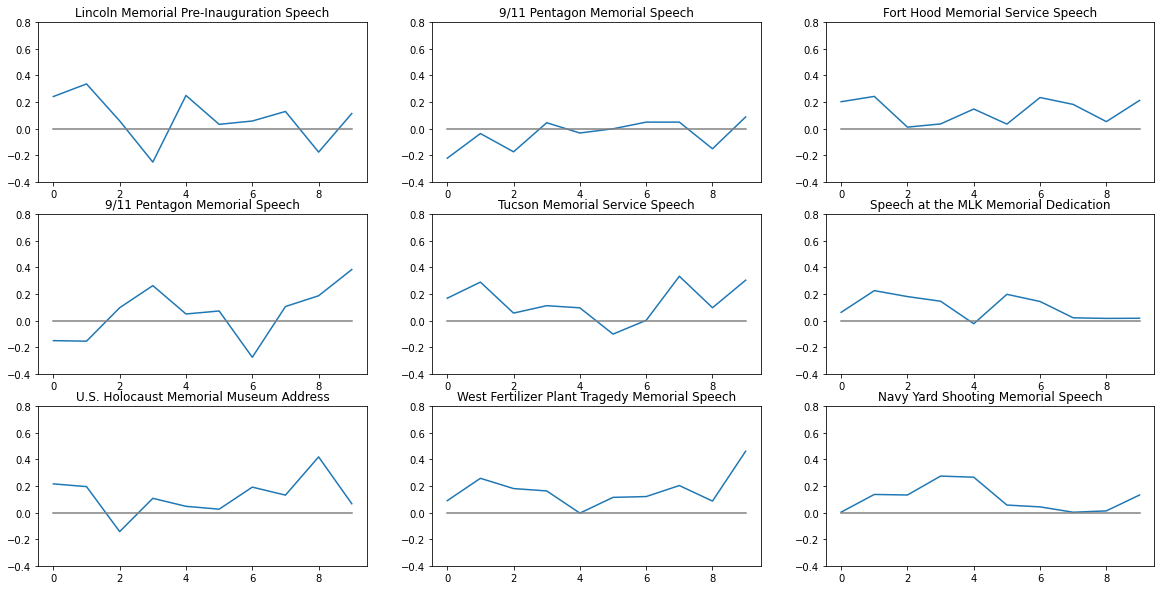

In [46]:
plt.rcParams['figure.figsize'] = [20,10]
n=0
nw = [10, 45,47,96,105, 133, 144, 182,199]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

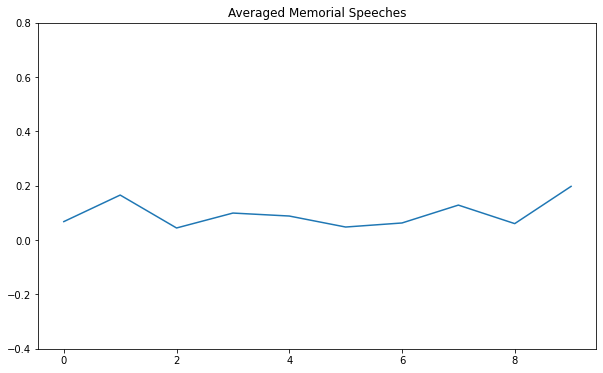

In [47]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_memorial)
plt.title("Averaged Memorial Speeches")
plt.ylim(ymin=-.4, ymax=.8)
plt.show()

In [118]:
print(df['Title'][df['Title'].str.contains('State of the Union')])

106    Second Presidential State of the Union Speech
137     Third Presidential State of the Union Speech
209     Fifth Presidential State of the Union Speech
245     Sixth Presidential State of the Union Speech
Name: Title, dtype: object


In [119]:
speech_split = []
for i in [106,137,209,245]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [120]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_stateun = np.mean(speech_pol, axis=0)

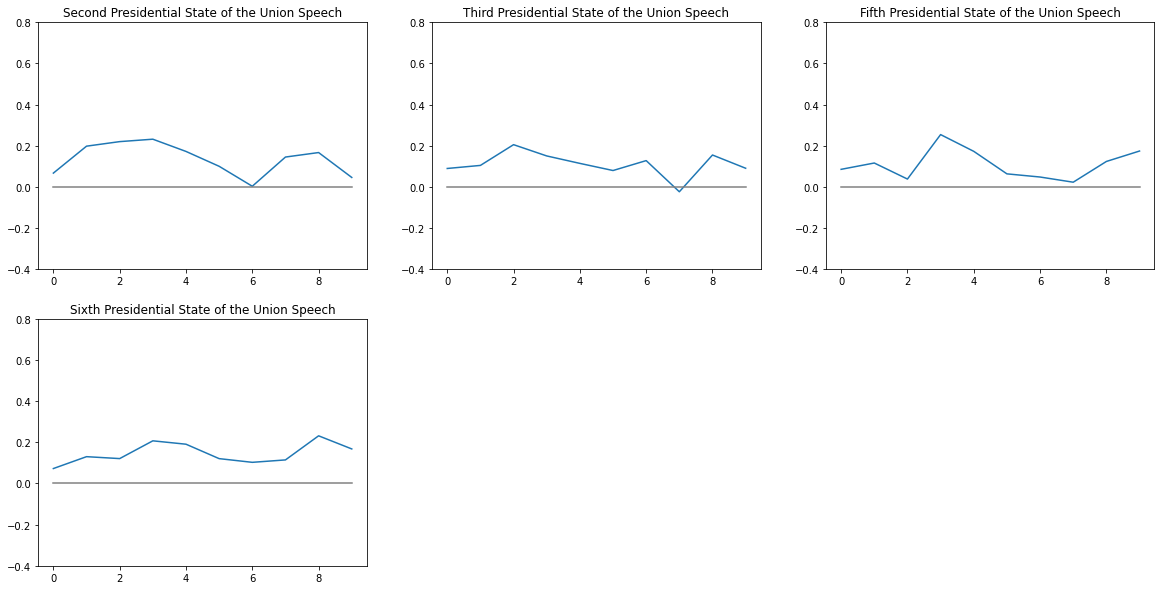

In [121]:
plt.rcParams['figure.figsize'] = [20,10]
n=0
nw = [106,137,209,245]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

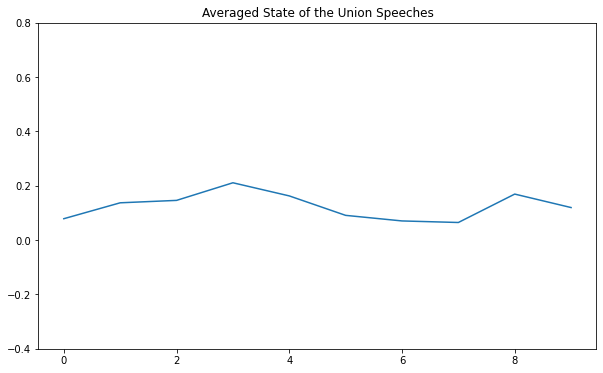

In [122]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_stateun)
plt.title("Averaged State of the Union Speeches")
plt.ylim(ymin=-.4, ymax=.8)
plt.show()

In [124]:
print(df['Title'][df['Title'].str.contains('Eulogy')])

42                      Eulogy for Ted Kennedy
75          Eulogy for Upper Big Branch Miners
76                   Eulogy for Dorothy Height
91                      Eulogy for Robert Byrd
165           Eulogy for Senator Daniel Inouye
263                  Eulogy for Beau Biden III
269    Eulogy for Revered Clementa C. Pinckney
Name: Title, dtype: object


In [126]:
speech_split = []
for i in [42,75,76,91,165,263,269]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [127]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_eulogy = np.mean(speech_pol, axis=0)

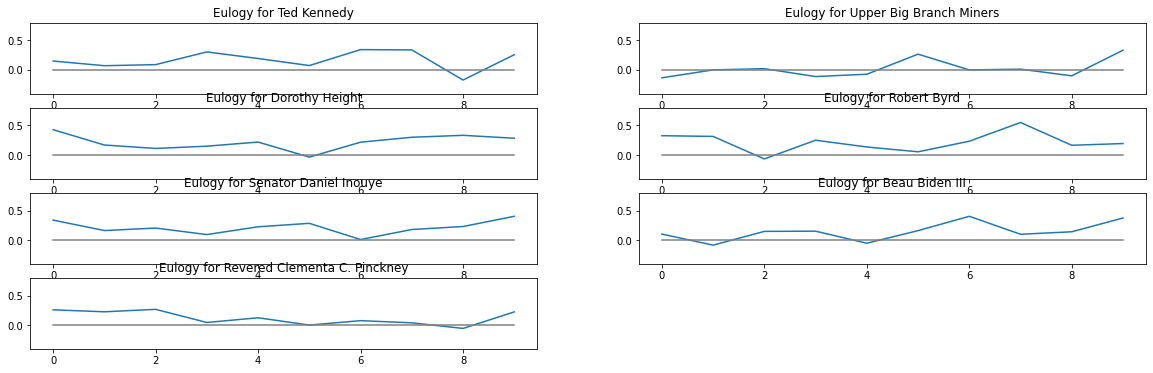

In [129]:
plt.rcParams['figure.figsize'] = [20,6]
n=0
nw = [42,75,76,91,165,263,269]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/2), 2, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

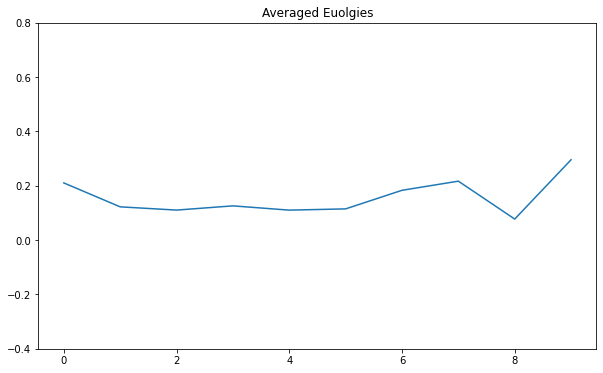

In [130]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_eulogy)
plt.title("Averaged Euolgies")
plt.ylim(ymin=-.4, ymax=.8) 
plt.show()

In [132]:
print(df['Title'][df['Title'].str.contains('Debate')])

156     First Debate with Mitt Romney
157    Second Debate with Mitt Romney
158     Third Debate with Mitt Romney
Name: Title, dtype: object


In [133]:
speech_split = []
for i in [156,157,158]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [134]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_debate= np.mean(speech_pol, axis=0)

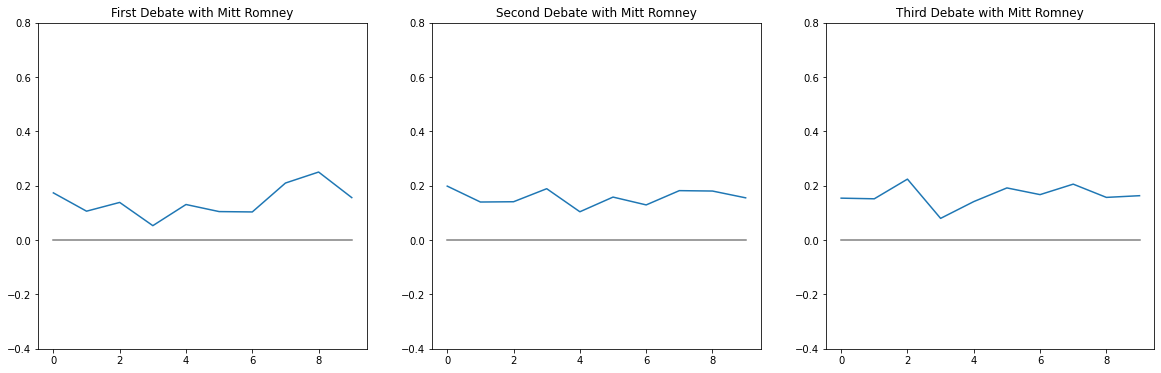

In [137]:
plt.rcParams['figure.figsize'] = [20,6]
n=0
nw =[156,157,158]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

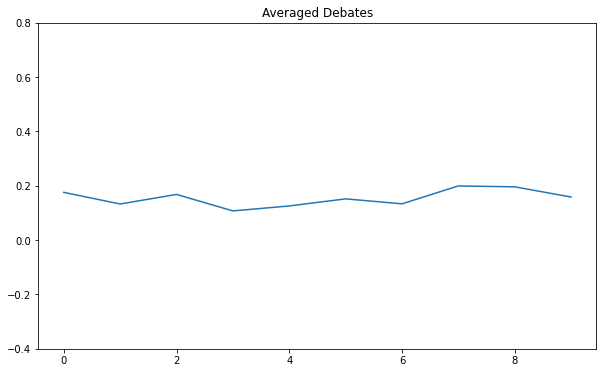

In [139]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_debate)
plt.title("Averaged Debates")
plt.ylim(ymin=-.4, ymax=.8) 
plt.show()

In [136]:
print(df['Title'][df['Title'].str.contains('Death')])

118    Speech Announcing the Death of Osama Bin Laden
134            Speech on the Death of Muammar Qaddafi
Name: Title, dtype: object


In [49]:
speech_split = []
for i in [118,134]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [50]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_death = np.mean(speech_pol, axis=0)

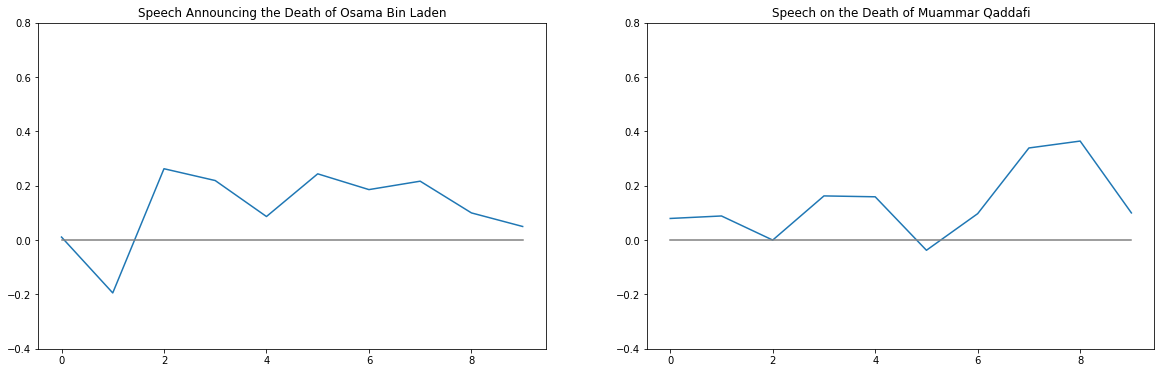

In [51]:
plt.rcParams['figure.figsize'] = [20,6]
n=0
nw = [118,134]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/2), 2, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

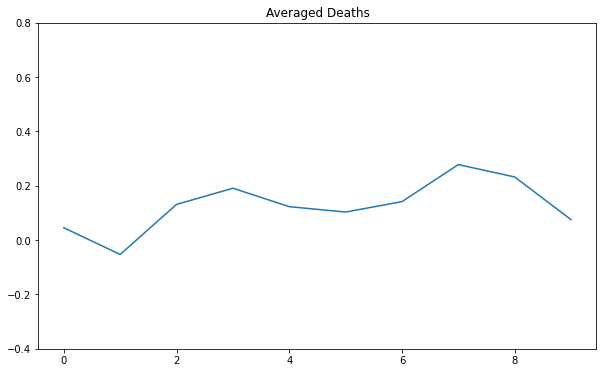

In [52]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_death)
plt.title("Averaged Deaths")
plt.ylim(ymin=-.4, ymax=.8) 
plt.show()

In [63]:
print(df['Title'][df['Title'].str.contains('Nuclear')])

254                  Statement on Iran Nuclear Agreement
273           Iran Nuclear Accord Agreement Announcement
274    Post Iran Nuclear Accord Agreement Press Confe...
278     Iran Nuclear Deal Address at American University
322             Nuclear Security Summit Press Conference
Name: Title, dtype: object


In [67]:
speech_split = []
for i in [254, 273, 274, 278, 322]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [68]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_nuclear = np.mean(speech_pol, axis=0)

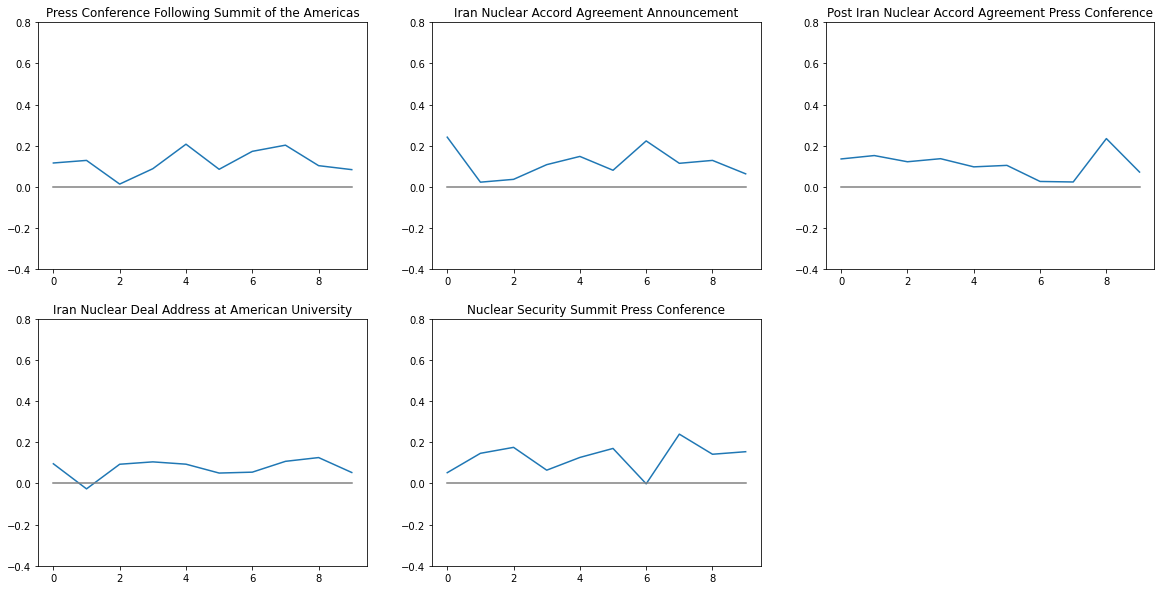

In [70]:
plt.rcParams['figure.figsize'] = [20,10]
n=0
nw =[257, 273, 274, 278, 322]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

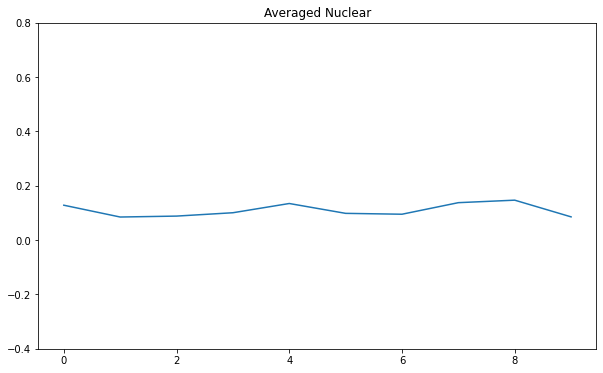

In [71]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_nuclear)
plt.title("Averaged Nuclear")
plt.ylim(ymin=-.4, ymax=.8) 
plt.show()

In [78]:
print(df['Title'][df['Title'].str.contains('Terror')])

54     On NW Flight 253 Terrorist Threat and Iran Vio...
186      National Defense University Speech on Terrorism
288             Statement on the Paris Terrorist Attacks
293    On Foreign and Domestic Strategies Against Ter...
Name: Title, dtype: object


In [79]:
speech_split = []
for i in [54, 186, 288, 293]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [80]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_terror = np.mean(speech_pol, axis=0)

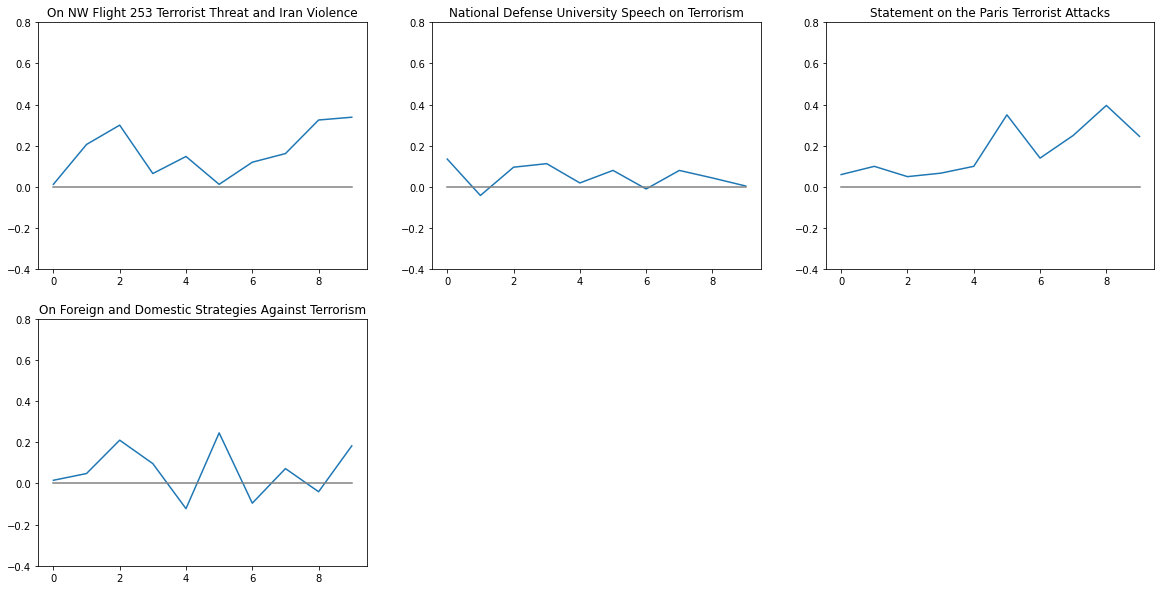

In [81]:
plt.rcParams['figure.figsize'] = [20,10]
n=0
nw =[54, 186, 288, 293]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

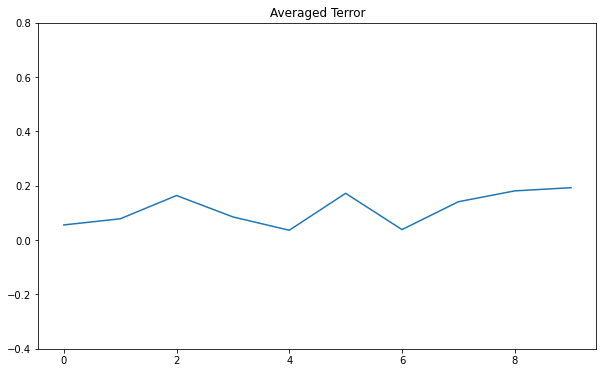

In [82]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_terror)
plt.title("Averaged Terror")
plt.ylim(ymin=-.4, ymax=.8) 
plt.show()

In [85]:
print(df['Title'][df['Title'].str.contains('Clim')])

2            Global Climate Summit Prerecorded Speech
53     UN Copenhagen Climate Change Conference Speech
296              Statement on Paris Climate Agreement
Name: Title, dtype: object


In [88]:
speech_split = []
for i in [2,53,296]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [91]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_climate = np.mean(speech_pol, axis=0)

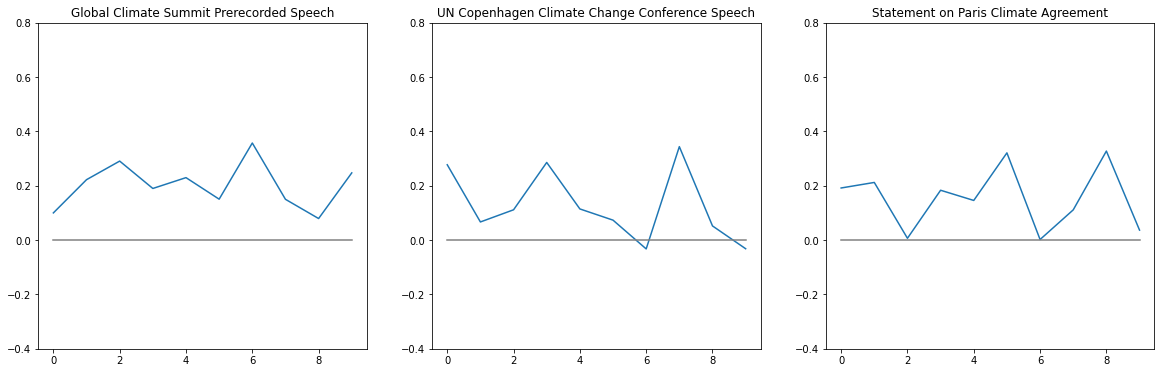

In [93]:
plt.rcParams['figure.figsize'] = [20,6]
n=0
nw =[2,53,296] 
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

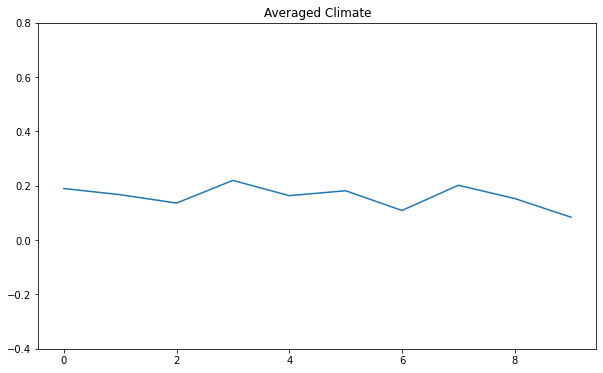

In [94]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_climate)
plt.title("Averaged Climate")
plt.ylim(ymin=-.4, ymax=.8) 
plt.show()

In [96]:
print(df['Title'][df['Title'].str.contains('Care')])

37     Third Prime Time Press Conference (Iran & Heat...
44           Joint Session of Congress Heath Care Speech
63          Unannounced Briefing on Health Care and Jobs
65            Vote Push on Heath Care Reform Legislation
67         Health Care Speech at George Mason University
68      Speech to House Democratic Caucus on Health Care
69     Speech on Signing Health Care Reform Bill into...
148    On the US Supreme Court Affordable Care Act Ru...
188     On Affordable Care Act and Domestic Surveillance
201        On Health Care at WJClinton Global Initiative
203           Affordable Care Act Website Issues Address
213    Press Conference on Affordable Care Act and Uk...
268        On the USSC Ruling on the Affordable Care Act
Name: Title, dtype: object


In [97]:
speech_split = []
for i in [44,63,65,67,68,69,148,188,201,202,213,268]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [98]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_healthcare = np.mean(speech_pol, axis=0)

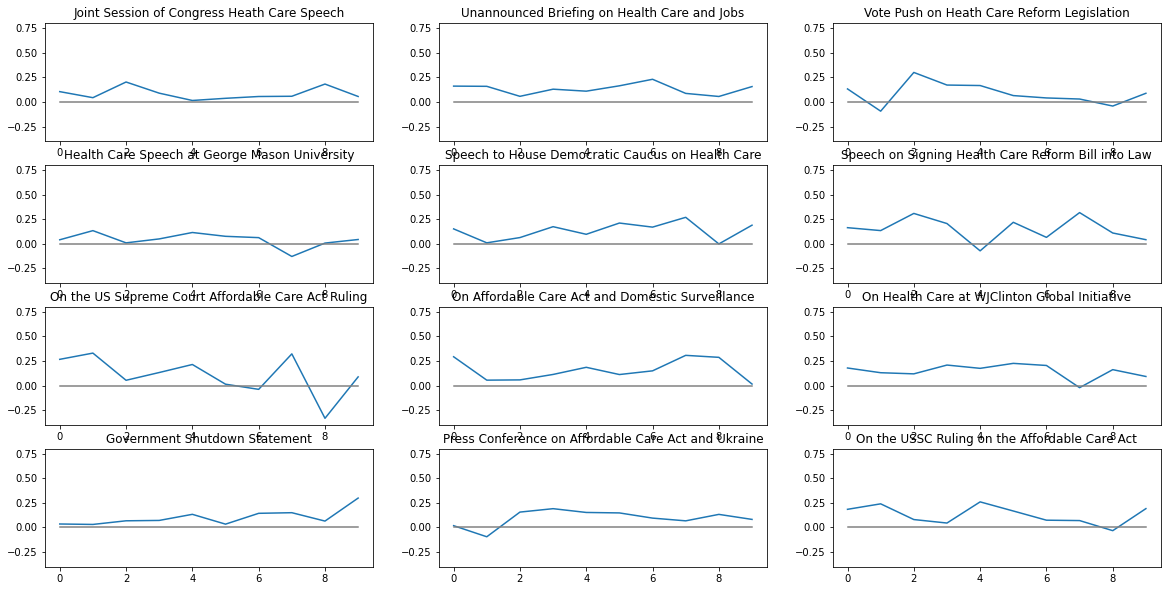

In [101]:
plt.rcParams['figure.figsize'] = [20,10]
n=0
nw =[44,63,65,67,68,69,148,188,201,202,213,268] 
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

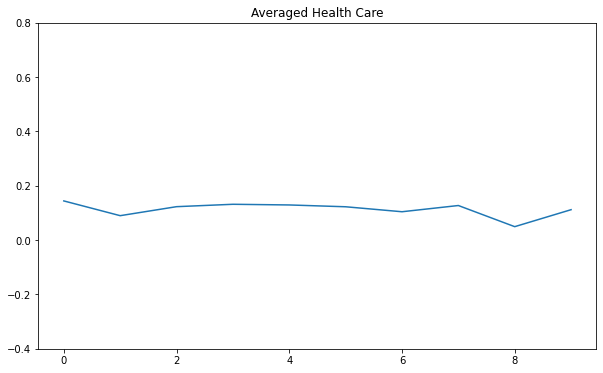

In [102]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_healthcare)
plt.title("Averaged Health Care")
plt.ylim(ymin=-.4, ymax=.8) 
plt.show()

In [109]:
print(df['Title'][df['Title'].str.contains('Econo')])

3                      Economic Team Announcement Speech
4          Economic Recovery Advisory Board Announcement
7               Remarks After Meeting with Economic Team
21          G-20 London Economic Summit Press Conference
38                     Moscow New Economic School Speech
83              Speech on the Economy at Carnegie Mellon
131    Joint Session of Congress Speech on Economy an...
170    On Strengthening the Economy for the Middle Class
194                   Knox College Speech on the Economy
Name: Title, dtype: object


In [110]:
speech_split = []
for i in [3,4,7,21,38,83,131,170,194]:
    speech_split.append(split_text(df.iloc[i, 2])) 
speech_amount = len(speech_split)

In [113]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)
avg_economy = np.mean(speech_pol, axis=0)

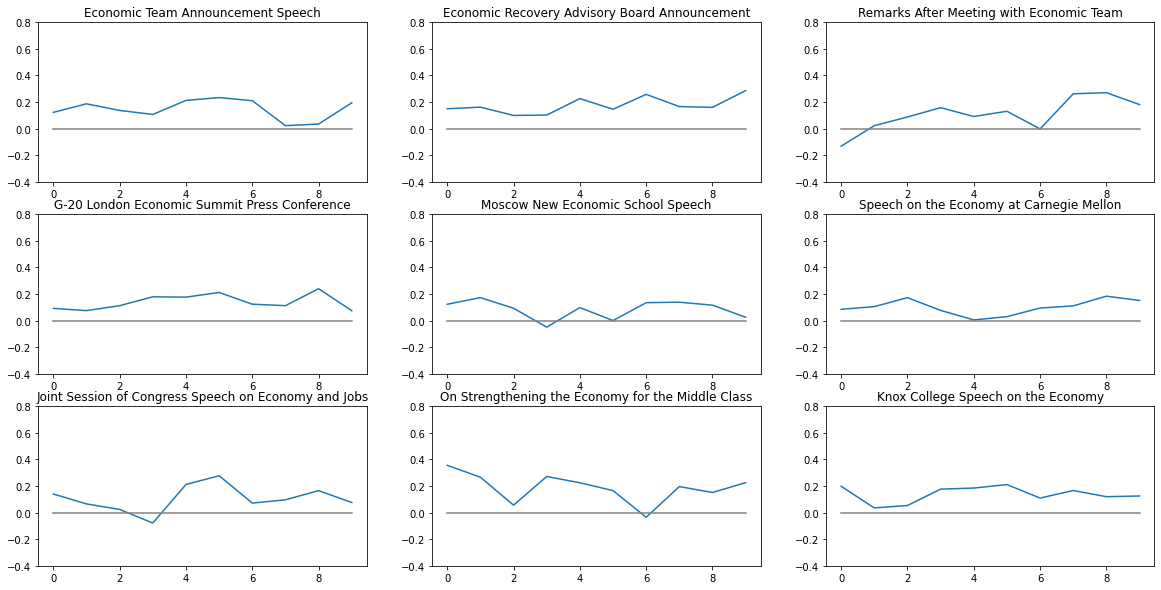

In [114]:
plt.rcParams['figure.figsize'] = [20,10]
n=0
nw = [3,4,7,21,38,83,131,170,194]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()

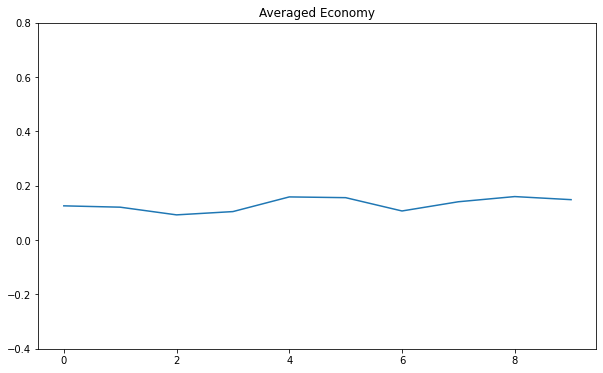

In [115]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(avg_economy)
plt.title("Averaged Economy")
plt.ylim(ymin=-.4, ymax=.8) 
plt.show()

Aggregated averaged Plots


 titles not content chosen: due to "dedication to one topic"

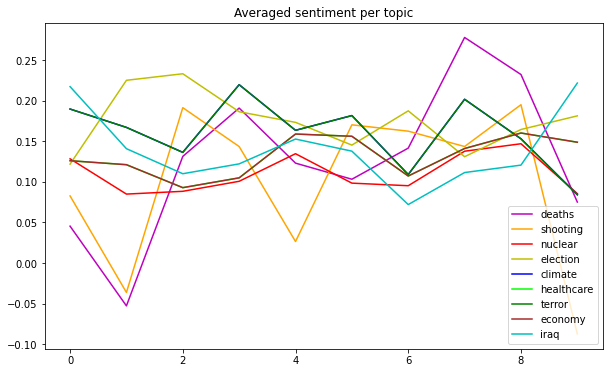

In [143]:
fig, ax = plt.subplots()
ax.plot(avg_death, 'm', label='deaths'); 
ax.plot(avg_shooting, 'orange', label='shooting'); 
ax.plot(avg_nuclear, 'r', label='nuclear'); 
ax.plot(avg_election, 'y', label='election');  
ax.plot(avg_climate, 'b', label='climate'); 
ax.plot(avg_healthcare, 'lime', label='healthcare'); 
ax.plot(avg_terror, 'g', label='terror');
ax.plot(avg_economy, 'brown', label='economy');
ax.plot(avg_iraq, 'c', label='iraq'); 
plt.legend()
plt.title("Averaged sentiment per topic")
plt.show()

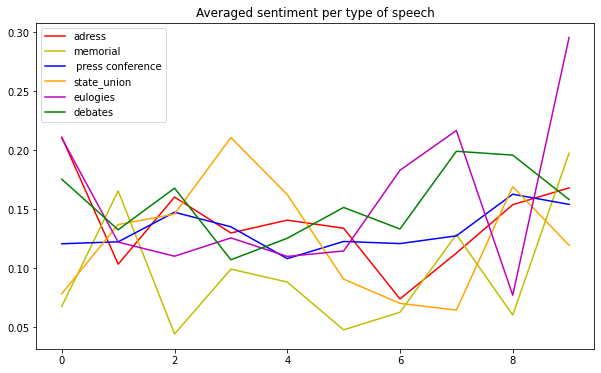

In [144]:
fig, ax = plt.subplots()
ax.plot(avg_address, 'r', label= 'adress'); 
ax.plot(avg_memorial, 'y', label='memorial');  
ax.plot(avg_press_conference, 'b', label=' press conference'); 
ax.plot(avg_stateun, 'orange', label='state_union'); 
ax.plot(avg_eulogy, 'm', label='eulogies'); 
ax.plot(avg_debate, 'g', label='debates'); 
plt.legend()
plt.title("Averaged sentiment per type of speech")
plt.show()